# Recallibration

In [1]:
from nhsmass.spectrum import Spectrum
from nhsmass.recal import ErrorTable, recallibrate
import nhsmass.draw as draw
import pandas as pd
import matplotlib.pyplot as plt


## Load spectrum and remove noise

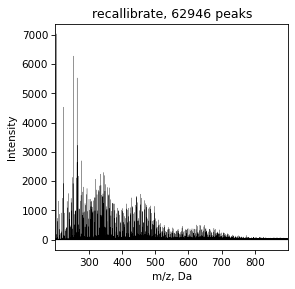

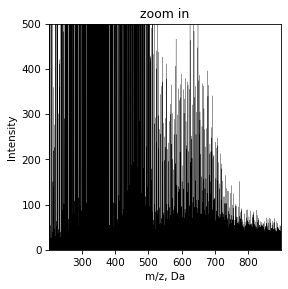

In [2]:
spec = Spectrum.read_csv(filename="data/recallibrate.txt",
                            mapper={'m/z':'mass', 'Intensity':'intensity'},
                            take_columns=['mass','intensity'],
                            sep='\t'
                            )
draw.spectrum(spec)
draw.spectrum(spec, ylim=(0,500), title='zoom in')


It can be seen that there is a lot of noise in the spectrum at an intensity level of 50-100. You can remove it using the noise_filter method with different settings - automatically with default settings, automatic with force control, by intensity and by the signal quartel that we want to drop.

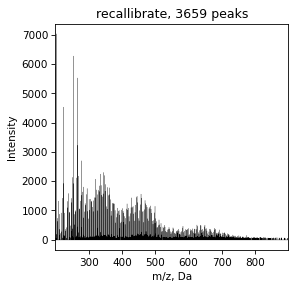

In [3]:
spec = spec.noise_filter(intensity=50)
draw.spectrum(spec)

Try to assign witout recallibration

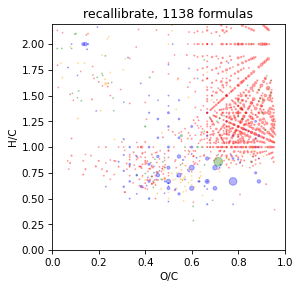

In [4]:
spec = spec.assign()
draw.vk(spec)

It is look bad and we should recallibrate spectrum before assign

## Recallibrate by etalon sample

We can use extarnal etalon spectrum or calculated standart

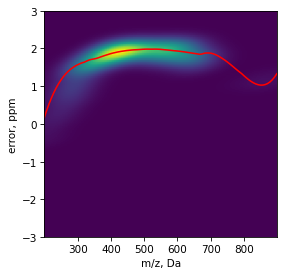

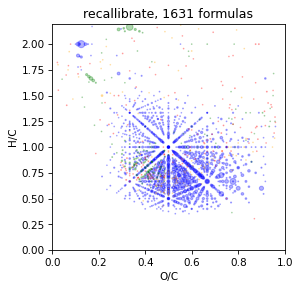

In [5]:
spec = Spectrum.read_csv(filename="data/recallibrate.txt",
                            mapper={'m/z':'mass', 'Intensity':'intensity'},
                            take_columns=['mass','intensity'],
                            sep='\t',
                            intens_min=50
                            ).noise_filter(intensity=50)

spec = spec.assign()
spec = recallibrate(spec, how='data/etalon.txt')
spec = spec.assign()
draw.vk(spec)

It is looking better

## Self-recallibrate by assign error

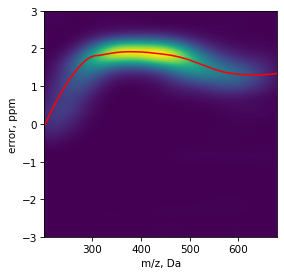

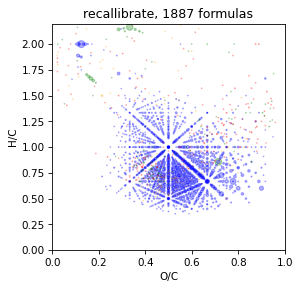

In [6]:
spec = Spectrum.read_csv(filename="data/recallibrate.txt",
                            mapper={'m/z':'mass', 'Intensity':'intensity'},
                            take_columns=['mass','intensity'],
                            sep='\t'
                            ).noise_filter(intensity=50)
                            
spec = recallibrate(spec)
spec = spec.assign()
draw.vk(spec)

It is also good

## Recallibrate by mass difference map

It is base on calculation difference in mass bitween all signals. Usually, the occurring differences are discrete due to frequently occurring fragments, eg CH2. If the average mass of a given fragment differs, then the spectrum can be recalibrated on this basis. Before apply spectrum must be assigned

Read more in the article: Smirnov, K. S., Forcisi, S., Moritz, F., Lucio, M., & Schmitt-Kopplin, P. (2019). Mass difference maps and their application for the recalibration of mass spectrometric data in nontargeted metabolomics. Analytical chemistry, 91(5), 3350-3358.

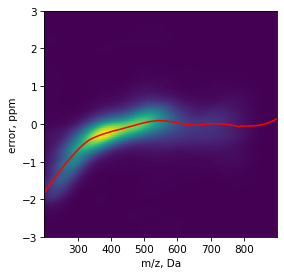

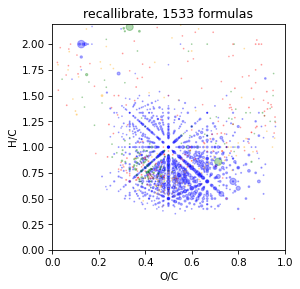

In [7]:
spec = Spectrum.read_csv(filename="data/recallibrate.txt",
                            mapper={'m/z':'mass', 'Intensity':'intensity'},
                            take_columns=['mass','intensity'],
                            sep='\t'
                            ).noise_filter(intensity=50)
spec = spec.assign()
spec = recallibrate(spec, how='mdm')
spec = spec.assign()
draw.vk(spec)

## Manual recallibrate

Set error table or load it from file

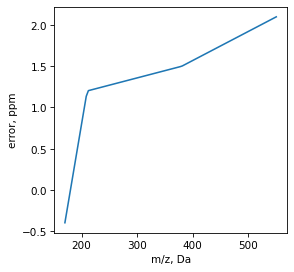

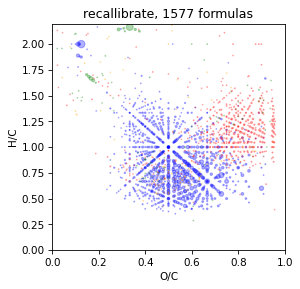

In [8]:
data = [[170, -0.4],
        [210, 1.2],
        [380, 1.5],
        [550, 2.1]]
df = pd.DataFrame(data, columns=['mass','ppm'])

err = ErrorTable(df).extrapolate() #load and extraoplate data for all diapasone
err.show_error()

spec = Spectrum.read_csv(filename="data/recallibrate.txt",
                            mapper={'m/z':'mass', 'Intensity':'intensity'},
                            take_columns=['mass','intensity'],
                            sep='\t',
                            ).noise_filter(intensity=50)

spec = recallibrate(spec, err)
spec = spec.assign()
draw.vk(spec)